# OpenMapFlow Tutorial

<img src="https://raw.githubusercontent.com/nasaharvest/openmapflow/main/assets/quick-map3.gif" width="80%"/>

### Sections
1. Installing OpenMapFlow
2. Exploring labeled earth observation data
3. Training a model
4. Doing inference over small region
5. Deploying of best model

### Prerequisites:
- Github account
- Github access token (obtained [here](https://docs.github.com/en/authentication/keeping-your-account-and-data-secure/creating-a-personal-access-token))
- Forked OpenMapFlow repository
- Basic Python knowledge  

### Editable Google Doc for Q&A:
https://docs.google.com/document/d/1Kp6MphER1G5tdLYeAzl4n19S10TweIxiYT64rXsjKm4/edit?usp=sharing

## 1. Clone Github repo and install OpenMapFlow

<img src="https://storage.googleapis.com/harvest-public-assets/openmapflow/title.png" width="70%"/>

In [ ]:
!pip install "ipywidgets>=7,<8" -q # https://github.com/googlecolab/colabtools/issues/3020

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.8 MB/s eta 0:00:00


In [ ]:
from ipywidgets import HTML, Password, Text, Textarea, VBox
inputs = [
      Password(description="Github Token:"),
      Text(description='Github Email:'),
      Text(description='Github User:'),
]
VBox(inputs)

The OpenMapFlow repository will be cloned to allow access to already available data.

Ensure you have created a fork of the repository.

In [ ]:
token = inputs[0].value
email = inputs[1].value
username = inputs[2].value

github_url_input = Textarea(value=f'https://github.com/{username}/openmapflow.git')
VBox([HTML(value="<b>Github Clone URL</b>"), github_url_input])

In [ ]:
from pathlib import Path

github_url = github_url_input.value
project_name = "crop-mask-example" # maize-example
country_name = "Togo" # Kenya

for input_value in [token, email, username, github_url]:
  if input_value.strip() == "":
    raise ValueError("Found input with blank value.")

path_to_project = f"{Path(github_url).stem}/{project_name}"

!git config --global user.email $username
!git config --global user.name $email
!git clone {github_url.replace("https://", f"https://{username}:{token}@")}

%cd {path_to_project}

!pip install openmapflow[all]==0.2.2rc1 -q
!pip install dvc[gs] cmocean pyyaml==5.4.1 -q

Cloning into 'openmapflow'...
remote: Enumerating objects: 4760, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 4760 (delta 80), reused 131 (delta 75), pack-reused 4610
Receiving objects: 100% (4760/4760), 181.96 MiB | 39.07 MiB/s, done.
Resolving deltas: 100% (3147/3147), done.
/content/openmapflow/crop-mask-example
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 117.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.1/313.1 kB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
!pip install dvc[gs] -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.2/512.2 kB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.4/421.4 kB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ..

In [ ]:
# Installing gdal
%%shell
yes | add-apt-repository ppa:ubuntugis/ppa && apt-get update -qq
apt-get install python3-gdal gdal-bin -y -q

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu/ jammy main'
Description:
Official stable UbuntuGIS packages.


More info: https://launchpad.net/~ubuntugis/+archive/ubuntu/ppa
Adding repository.
Found existing deb entry in /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Adding deb entry to /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Found existing deb-src entry in /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Adding key to /etc/apt/trusted.gpg.d/ubuntugis-ubuntu-ppa.gpg with fingerprint 6B827C12C2D425E227EDCA75089EBE08314DF160
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://a

In [ ]:
# CLI
!openmapflow

---------------------------------------------------------------------------------
                              OpenMapFlow CLI
---------------------------------------------------------------------------------
openmapflow cp <source> <destination> - copy a file or directory from the library
openmapflow create-datasets - creates datasets for all datasets in datasets.py
openmapflow datapath <DATAPATH> - outputs a relative path to the data directory
openmapflow datasets - outputs a list of all datasets
openmapflow deploy - deploys Google Cloud Architecture for project
openmapflow dir - outputs openmapflow library directory
openmapflow generate - generates an openmapflow project
openmapflow help - outputs this message
openmapflow ls - lists files in openmapflow library directory
openmapflow version - package version


## 2. Exploring labeled earth observation data 🛰️

<img src="https://storage.googleapis.com/harvest-public-assets/openmapflow/step1.png" width="70%"/>

In [ ]:
# A Google Cloud Account is required to access the data
!gcloud auth application-default login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=R8N8kVwODLbDNfYFIyAfY6zKQfbcd7&prompt=consent&access_type=offline&code_challenge=OtYtMb5CurOIMHnOKc9_Xm6bXgWDlSazrxhOfM5bieE&code_challenge_method=S256

Enter authorization code: 4/0AfJohXl9vZBy7tdz1smbdCy8-PxQw6a_d8_ozbw5yWrXut7IO8oXaD1GJjnam2oA246guw

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).
Cannot find a quota project to add to ADC. You might receive a "quota exceeded" or "API not enable

In [ ]:
# Pull in data already available
!dvc pull

  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
Fetching
!
  0% |          |0/? [00:00<?,    ?files/s]
                                           
Querying remote cache:   0% 0/3 [00:00<?, ?files/s]
Querying remote cache:   0% 0/3 [00:00<?, ?files/s{'info': ''}]
Querying remote cache:  33% 1/3 [00:00<00:00,  9.70files/s{'info': ''}]
                                                                       
!
  0%|          |Fetching from gs                      0/? [00:00<?,     ?file/s]
Fetching from gs:   0% 0/37 [00:00<?, ?file/s{'info': ''}]                      
Fetching from gs:   0% 0/29 [00:00<?, ?file/s{'info': ''}]

!

  0%|          |openmapflow-public/dvc/crop-mask-ex0.00/? [00:00<?,        ?B/s]

  0% 0.00/597 [00:00<?, ?B/s{'info': ''}]                                       
Fetching from gs:   3% 1/29 [00:00<00:05,  4.90file/s{'info': ''}]

                                       

In [ ]:
### Download pulled data
import os
import shutil
os.chdir('/content/openmapflow/crop-mask-example/data')
shutil.make_archive('data', format='zip')

'data.zip'

In [ ]:
# See report of data already available
!openmapflow datasets

DATASET REPORT (autogenerated, do not edit directly)

GeowikiLandcover2017 (Timesteps: 24)
----------------------------------------------------------------------------
eo_data_complete          34270
eo_data_export_failed       841
eo_data_missing_values      379
✔ training amount: 34270, positive class: 21.2%



TogoCrop2019 (Timesteps: 24)
----------------------------------------------------------------------------
eo_data_complete          1577
eo_data_export_failed        5
eo_data_missing_values       3
eo_data_duplicate            1
✔ training amount: 991, positive class: 53.0%
✔ validation amount: 277, positive class: 56.7%
✔ testing amount: 309, positive class: 34.6%



### Exploring labels

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from datasets import datasets, label_col
from openmapflow.constants import LAT, LON, DATASET, SUBSET

ImportError: ignored

In [ ]:
# Load data as csv
df = pd.concat([d.load_df(to_np=True) for d in datasets])
df.head()

  0%|          | 0/34270 [00:00<?, ?it/s]

  0%|          | 0/1577 [00:00<?, ?it/s]

,lon,lat,start_date,end_date,source,class_probability,num_labelers,subset,analysis_duration,email,country,dataset,eo_data,eo_lon,eo_lat,eo_file,eo_status
0,46.25,-16.547619,2017-01-01,2018-12-31,loc_all_2.txt,0.000000,5,training,",,,,",",,,,",global,geowiki_landcover_2017,"[[-11.33629640400522, -16.3480420774596, 882.0...",46.249987,-16.547641,min_lat=-16.5483_min_lon=46.2493_max_lat=-16.5...,eo_data_complete
1,48.25,-18.547619,2017-01-01,2018-12-31,loc_all_2.txt,0.136000,5,training,",,,,",",,,,",global,geowiki_landcover_2017,"[[-13.138938110314605, -20.403886117012583, 12...",48.249996,-18.547650,min_lat=-18.5483_min_lon=48.2492_max_lat=-18.5...,eo_data_complete
2,44.25,-21.547619,2017-01-01,2018-12-31,loc_all_2.txt,0.000000,5,training,",,,,",",,,,",global,geowiki_landcover_2017,"[[-15.08084961933566, -20.125167634501317, 131...",44.249978,-21.547574,min_lat=-21.5483_min_lon=44.2492_max_lat=-21.5...,eo_data_complete
3,45.25,-17.547619,2017-01-01,2018-12-31,loc_all_2.txt,0.073333,12,training,",,,,,,,,,,,",",,,,,,,,,,,",global,geowiki_landcover_2017,"[[-11.979642809487208, -15.915351816087977, 10...",45.249982,-17.547646,min_lat=-17.5483_min_lon=45.2492_max_lat=-17.5...,eo_data_complete
4,46.25,-21.547619,2017-01-01,2018-12-31,loc_all_2.txt,0.000000,5,training,",,,,",",,,,",global,geowiki_landcover_2017,"[[-13.057057751387175, -17.492752189250616, 90...",46.249987,-21.547574,min_lat=-21.5483_min_lon=46.2492_max_lat=-21.5...,eo_data_complete


In [ ]:
df.to_csv('df.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35847 entries, 0 to 1585
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lon                35847 non-null  float64
 1   lat                35847 non-null  float64
 2   start_date         35847 non-null  object 
 3   end_date           35847 non-null  object 
 4   source             35847 non-null  object 
 5   class_probability  35847 non-null  float64
 6   num_labelers       35847 non-null  int64  
 7   subset             35847 non-null  object 
 8   analysis_duration  34575 non-null  object 
 9   email              34575 non-null  object 
 10  country            35847 non-null  object 
 11  dataset            35847 non-null  object 
 12  eo_data            35847 non-null  object 
 13  eo_lon             35847 non-null  float64
 14  eo_lat             35847 non-null  float64
 15  eo_file            35847 non-null  object 
 16  eo_status          3584

<ipython-input-56-ec5c16fd8083>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


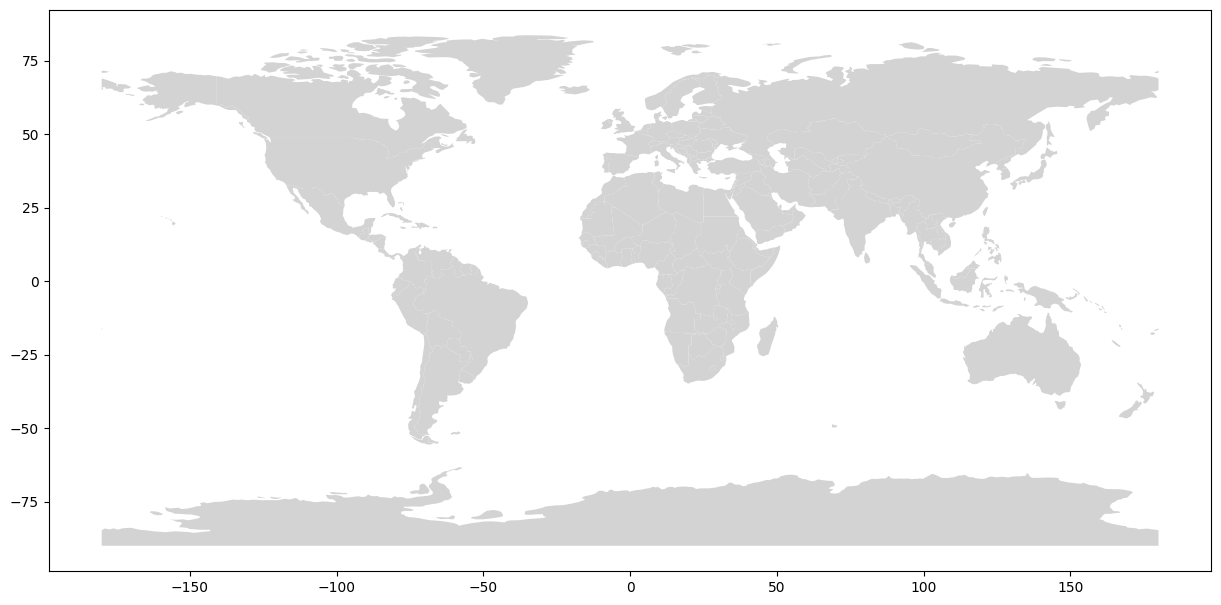

In [ ]:
# Plot map where labels should go
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(facecolor="lightgray", figsize=(15, 15));

In [ ]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
mexico = world[world['name']=='Mexico']

In [ ]:
mexico.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
27,127575529.0,North America,Mexico,MEX,1268870,"POLYGON ((-117.12776 32.53534, -115.99135 32.6..."


<Axes: >

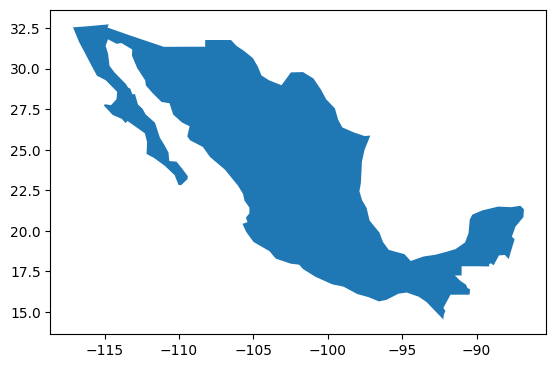

In [ ]:
mexico.plot()

In [ ]:
mexico.geometry

27    POLYGON ((-117.12776 32.53534, -115.99135 32.6...
Name: geometry, dtype: geometry

In [ ]:
# Convert pandas dataframe to geopandas dataframe
gdf = gpd.GeoDataFrame(df)
gdf["geometry"] = [Point(xy) for xy in zip(gdf[LON], gdf[LAT])]

<ipython-input-64-2f65300ba317>:3: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = [Point(xy) for xy in zip(gdf[LON], gdf[LAT])]


In [ ]:
gdf.to_csv()

In [ ]:
gdf.columns

Index(['lon', 'lat', 'start_date', 'end_date', 'source', 'class_probability',
       'num_labelers', 'subset', 'analysis_duration', 'email', 'country',
       'dataset', 'eo_data', 'eo_lon', 'eo_lat', 'eo_file', 'eo_status',
       'geometry'],
      dtype='object')

In [ ]:
puntos_mexico = gpd.sjoin(gdf, mexico)

<ipython-input-49-7be8dd81444a>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  puntos_mexico = gpd.sjoin(gdf, mexico)


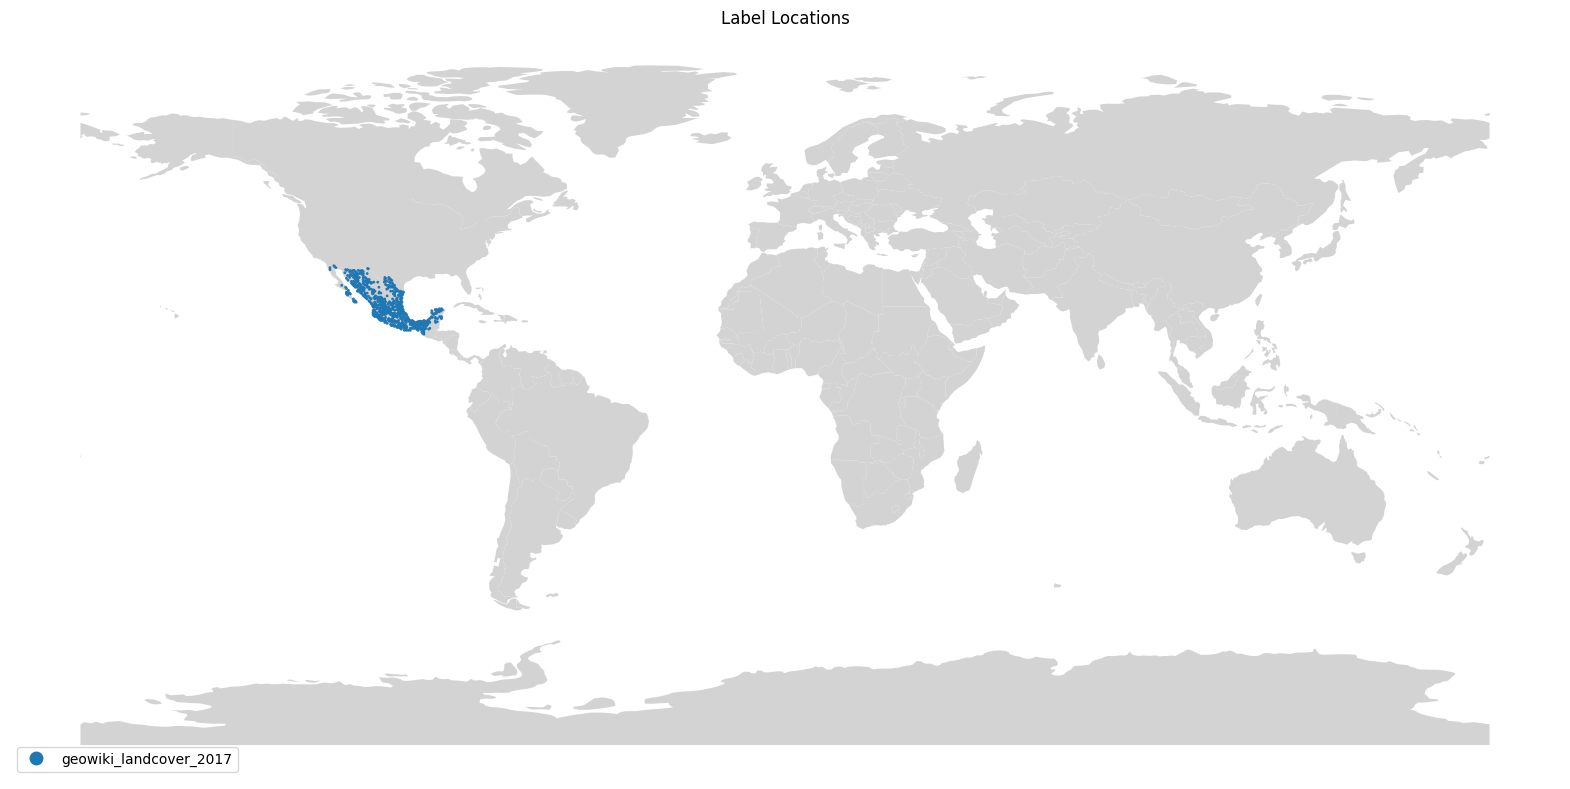

In [ ]:
ax = world.plot(figsize=(20,20), facecolor="lightgray")
ax.set_title("Label Locations")
ax.axis('off')
puntos_mexico.plot(
    ax=ax,
    marker='o',
    categorical=True,
    markersize=1,
    column=DATASET,
    legend=True,
    legend_kwds={'loc': 'lower left'});

In [ ]:
puntos_mexico.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 674 entries, 4094 to 35169
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   lon                674 non-null    float64 
 1   lat                674 non-null    float64 
 2   start_date         674 non-null    object  
 3   end_date           674 non-null    object  
 4   source             674 non-null    object  
 5   class_probability  674 non-null    float64 
 6   num_labelers       674 non-null    int64   
 7   subset             674 non-null    object  
 8   analysis_duration  674 non-null    object  
 9   email              674 non-null    object  
 10  country            674 non-null    object  
 11  dataset            674 non-null    object  
 12  eo_data            674 non-null    object  
 13  eo_lon             674 non-null    float64 
 14  eo_lat             674 non-null    float64 
 15  eo_file            674 non-null    object  


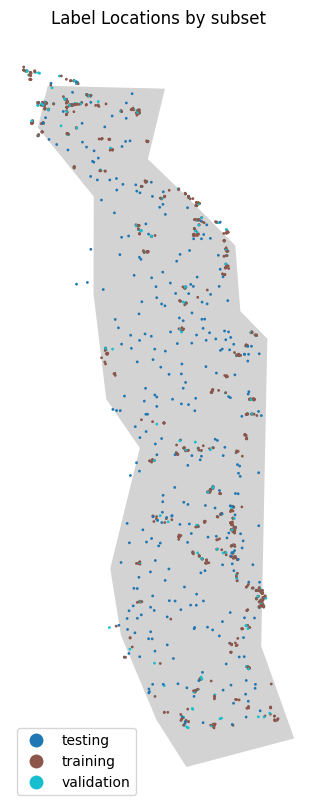

In [ ]:
country = world[world["name"] == country_name]
ax = country.plot(figsize=(10,10), facecolor="lightgray")
ax.set_title("Label Locations by subset")
ax.axis('off')

points = gdf[gdf["country"] == country_name]
points.plot(
    ax=ax,
    marker='o',
    categorical=True,
    markersize=1,
    column="subset",
    legend=True,
    legend_kwds={'loc': 'lower left'});

In [ ]:
country.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1 entries, 58 to 58
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     1 non-null      float64 
 1   continent   1 non-null      object  
 2   name        1 non-null      object  
 3   iso_a3      1 non-null      object  
 4   gdp_md_est  1 non-null      int64   
 5   geometry    1 non-null      geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 56.0+ bytes


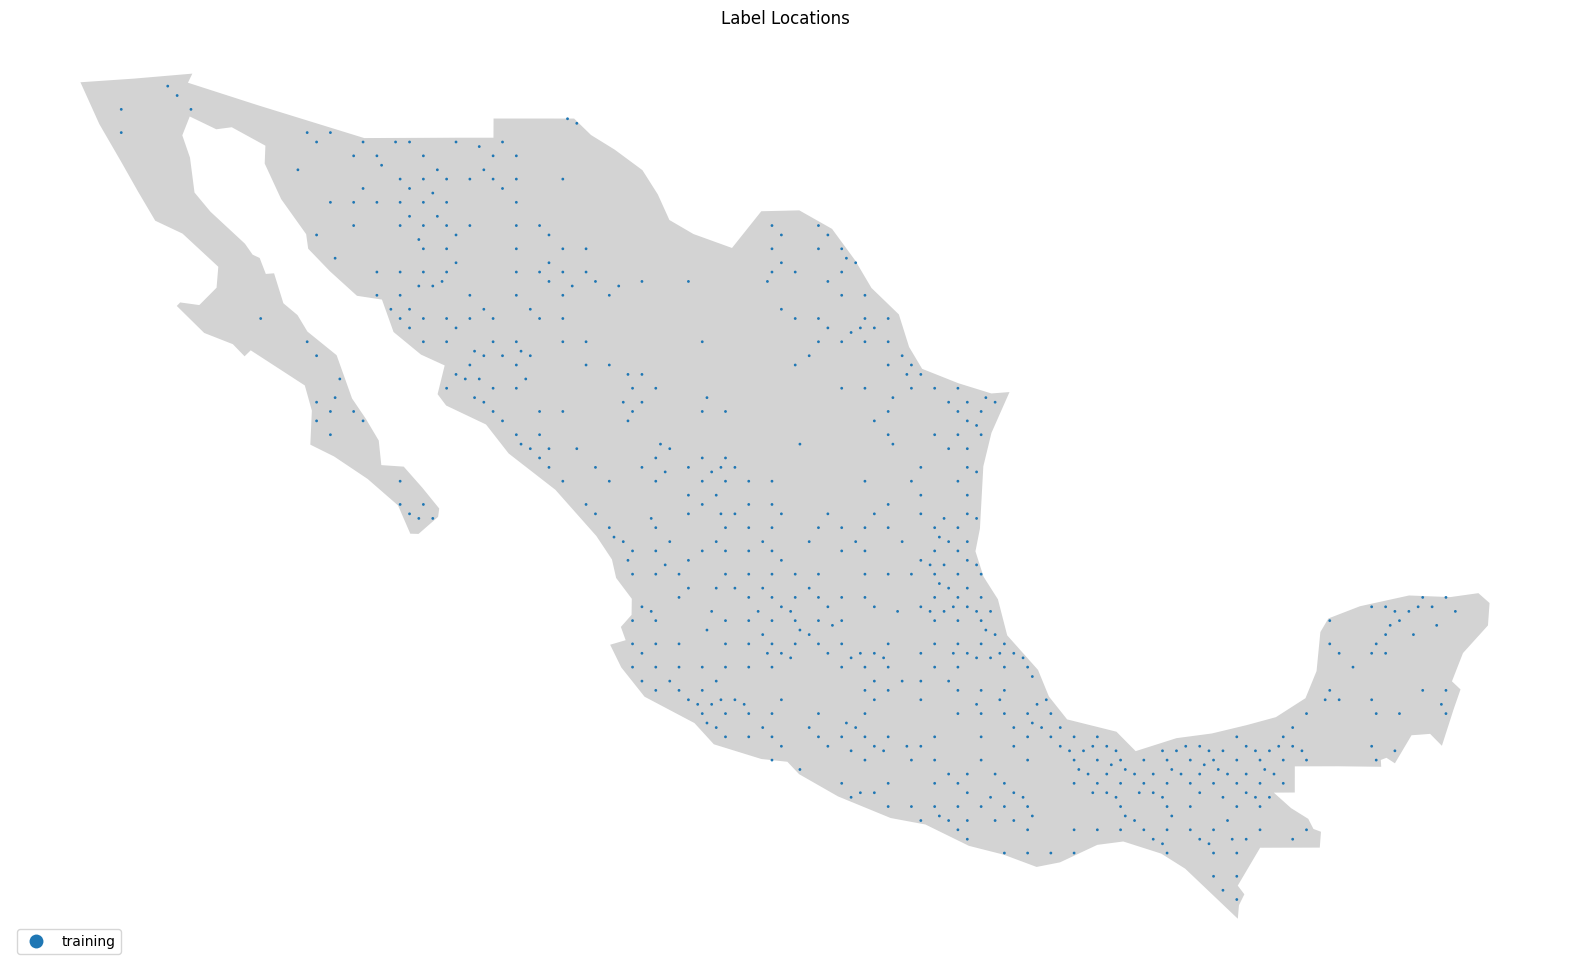

In [ ]:
ax = mexico.plot(figsize=(20,20), facecolor="lightgray")
ax.set_title("Label Locations")
ax.axis('off')
puntos_mexico.plot(
    ax=ax,
    marker='o',
    categorical=True,
    markersize=1,
    column="subset",
    legend=True,
    legend_kwds={'loc': 'lower left'});

In [ ]:
puntos_mexico.to_csv('puntos_mexico.csv')

/content/openmapflow/crop-mask-example/openmapflow/crop-mask-example


In [ ]:
'/content/openmapflow/crop-mask-example/openmapflow/crop-mask-example'


In [ ]:
try:
  from google.colab import files
  files.download('puntos')
except Exception:
  pass

### Exploring earth observation data

In [ ]:
import matplotlib.pyplot as plt
from openmapflow.constants import MONTHS, EO_DATA
from openmapflow.bands import BANDS

In [ ]:
# Get a label with postive class
positive_example = df[(df[label_col] == 1.0) & (df[SUBSET] == "validation")].iloc[0]
positive_example

lon                                                           1.412409
lat                                                           7.584598
start_date                                                  2019-01-01
end_date                                                    2020-12-31
source                                              crop_merged_v2.zip
class_probability                                                  1.0
num_labelers                                                         1
subset                                                      validation
analysis_duration                                                  NaN
email                                                              NaN
country                                                           Togo
dataset                                                      Togo_2019
eo_data              [[-12.985443296925618, -20.385652333359076, 14...
eo_lon                                                        1.412376
eo_lat

In [ ]:
# Load earth observation data for label
positive_example[EO_DATA].shape

(24, 18)

**Available earth observation bands**

<img src="https://storage.googleapis.com/harvest-public-assets/openmapflow/cropharvest_bands.png" width="80%"/>

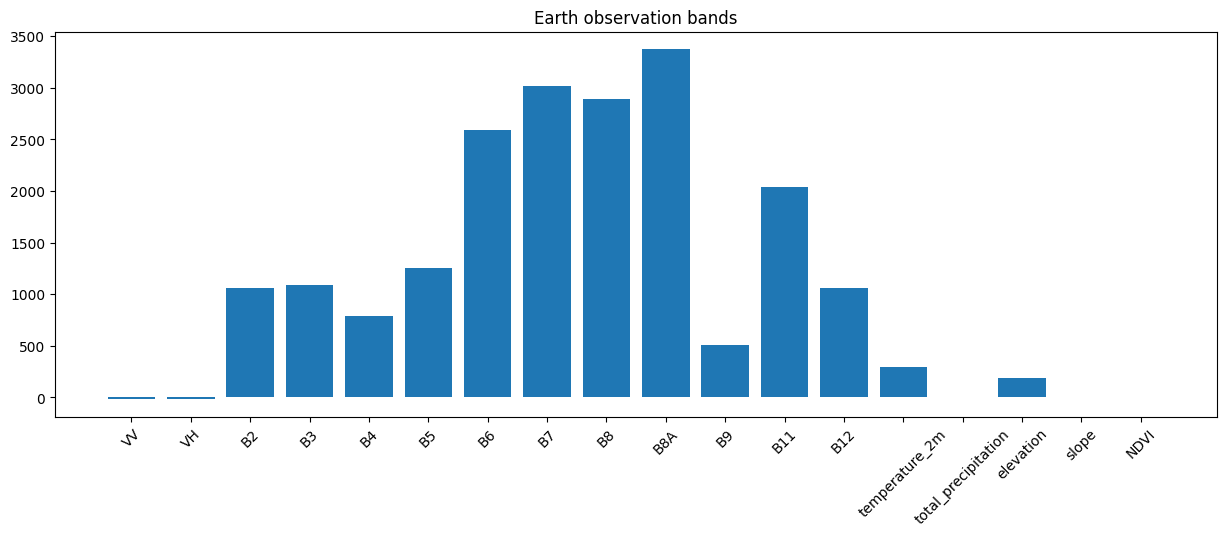

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.bar(x=BANDS, height=positive_example[EO_DATA][10])
ax.set_title("Earth observation bands")
plt.xticks(rotation=45);

### ❗**Challenge**❗

Plot the NDVI (normalized difference vegetation index) for positive and negative example data over a one year period.

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.set_title("NDVI")
plt.xticks(rotation=45)

positive_class_ndvi = positive_example[EO_DATA][:12, -1]
ax.plot(MONTHS, positive_class_ndvi, label="Positive class")

##########################################
negative_example = # YOUR CODE HERE
##########################################
negative_example_ndvi = negative_example[EO_DATA][:12, -1]
ax.plot(MONTHS, negative_example_ndvi, label="Negative class")

ax.legend()

gmap_url = "http://maps.google.com/maps?z=12&t=k&q=loc:"
print(f"Positive class: {gmap_url}{positive_example[LAT]}+{positive_example[LON]}")
print(f"Negative class: {gmap_url}{negative_example[LAT]}+{negative_example[LON]}")

## 3. Train a model 🏋️‍♂️

<img src="https://storage.googleapis.com/harvest-public-assets/openmapflow/step2.png" width="80%"/>

<img src="https://storage.googleapis.com/harvest-public-assets/openmapflow/train_model.png" width="80%" />

In [ ]:
import os
os.environ["MODEL_NAME"] = input("MODEL_NAME=")

`train.py` can be opened in Colab directly using the sidebar.

In [ ]:
!python train.py --model_name $MODEL_NAME --epoch 3

### ❗**Optional Challenge**❗

Try to improve the model by modifying `{project_name}/train.py` in Colab directly

## 4. Inference over small region 🗺️

In [ ]:
from openmapflow.train_utils import model_path_from_name
from openmapflow.config import PROJECT
from openmapflow.inference import Inference
from openmapflow.bands import DYNAMIC_BANDS
from tqdm.notebook import tqdm
from pathlib import Path
from datetime import date
import cmocean
import numpy as np
import rasterio as rio
import torch

In [ ]:
tifs_dir = Path(f"/content/tifs")
preds_dir = Path(f"/content/preds")
tifs_dir.mkdir(exist_ok=True)
preds_dir.mkdir(exist_ok=True)

### Download example inference data

In [ ]:
prefix = "gs://harvest-public-assets/openmapflow/Togo_2019_demo_2019-02-01_2020-02-01"
paths = [
  f"{prefix}/00000000000-0000000000.tif",
  f"{prefix}/00000000000-0000000256.tif",
  f"{prefix}/00000000256-0000000000.tif",
  f"{prefix}/00000000256-0000000256.tif"
]

for p in tqdm(paths):
  !gsutil -m cp {p} {tifs_dir}/{Path(p).name}

In [ ]:
!gdalbuildvrt {tifs_dir}.vrt {tifs_dir}/*.tif
!gdal_translate -a_srs EPSG:4326 -of GTiff {tifs_dir}.vrt {tifs_dir}.tif

In [ ]:
def normalize(array):
    array_min, array_max = array.min(), array.max()*0.5
    return ((array - array_min)/(array_max - array_min))

month = 2
rgb_indexes = [DYNAMIC_BANDS.index(b) for b in ["B4", "B3", "B2"]]
eo_data = rio.open(f"{tifs_dir}.tif")
colors = [eo_data.read(i + month*len(DYNAMIC_BANDS)) for i in rgb_indexes]
normalized_colors = [normalize(c) for c in colors]
rgb = np.dstack(normalized_colors)
plt.figure(figsize=(10,10))
plt.title("Earth Observation data for one month")
plt.axis('off')
plt.imshow(rgb);

### Make predictions with model

In [ ]:
model = torch.jit.load(model_path_from_name(os.environ["MODEL_NAME"]))
inference = Inference(model=model, normalizing_dict=None)
local_pred_paths = []
tifs = list(Path(tifs_dir).glob("*.tif"))
for local_tif_path in tqdm(tifs, desc="Making predictions"):
  local_pred_path = Path(f"{preds_dir}/pred_{local_tif_path.stem}.nc")
  inference.run(
      local_path=local_tif_path,
      dest_path=local_pred_path
  )
  local_pred_paths.append(local_pred_path)

### Merge predictions into map

<img src="https://storage.googleapis.com/harvest-public-assets/openmapflow/merging_predictions.png" width="50%"/>

In [ ]:
!apt-get install python3-gdal=3.0.4+dfsg-1build3 gdal-bin=3.0.4+dfsg-1build3 libgdal-dev=3.0.4+dfsg-1build3 -qq
!gdalbuildvrt {preds_dir}.vrt {preds_dir}/*.nc

In [ ]:
!apt-get install python3-gdal gdal-bin libgdal-dev -qq
!gdal_translate -a_srs EPSG:4326 -of GTiff {preds_dir}.vrt {preds_dir}.tif

### Visualize predictions

In [ ]:
# Visualize
predictions_map = rio.open(f"{preds_dir}.tif")
if "maize" in PROJECT:
  cmap = cmocean.cm.solar
elif "crop" in PROJECT:
  cmap = cmocean.cm.speed
else:
  cmap = cmocean.cm.thermal

plt.figure(figsize=(10,10))
plt.imshow(predictions_map.read(1).clip(0,1), cmap=cmap)
plt.title(f"Map Preview: {PROJECT}")
plt.colorbar(fraction=0.03, pad=0.04)
plt.axis("off");

## 5. [OPTIONAL] Deployment - Push to dvc and git

In [ ]:
# Generate test metrics
!python evaluate.py --model_name $MODEL_NAME

In [ ]:
# This will only work if you have been granted write bucket permissions.
!dvc commit -q
!dvc push

In [ ]:
!git checkout -b"$MODEL_NAME"
!git add .
!git commit -m "$MODEL_NAME"
!git push --set-upstream origin "$MODEL_NAME"

Once Pull Request is merged model will be deployed for map creation.

<img src="https://storage.googleapis.com/harvest-public-assets/openmapflow/step3.png" width="80%"/>